# **MRTB1153 - PMA Part 2**
## **Title: Netflix Stock Price Prediction Using Machine Learning**
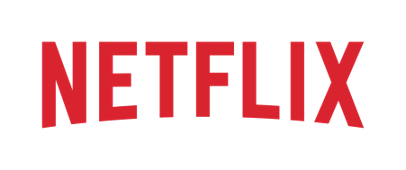
## Name: Lew Xin Yi
## Student ID: MRT211007
## Lecturer: Dr. Siti Sophiayati Yuhaniz

**Data source: https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction**

**Data: 5 year Netflix Stock Price from 5th Febraury 2018 to 5th February 2022**

## **Exploratory Data Analysis**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
#import required libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#read Netflix stock data as dataframe
stock = pd.read_csv('/content/drive/MyDrive/NFLX.csv')

In [4]:
#view the top 5 rows of the dataframe to check whether the correct data is called
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


By looking at the dataframe, there are 7 variables involved in the Netflix's stock raw dataset. 

Variables:
1. **Date**: Everyday Netflix stock price
2. **Open**: Price at which Netflix stock is opened
3. **High**: The highest price at which Netflix stock traded during the trading day
4. **Low**: The lowest price at which Netflix stock trades over a trading day
5. **Close**: The last price at which Netflix stock trades during a trading day
6. **Adj Close**: The closing price of Netflix stock after paying off dividends and/or capital gain distributions
7. **Volume**: Volume of stock traded during a trading day

In [5]:
#check the columns information 
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [7]:
#check the total number of rows and columns in the dataframe
stock.shape

(1009, 7)

- There are total 7 variables with 1009 records. 

In [8]:
#show the descriptive statistic for the numerical variables
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [9]:
#check whether there is any missing value in the data
stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

- There are no missing values exist in the dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2d8149eb0>,
      dtype=object)

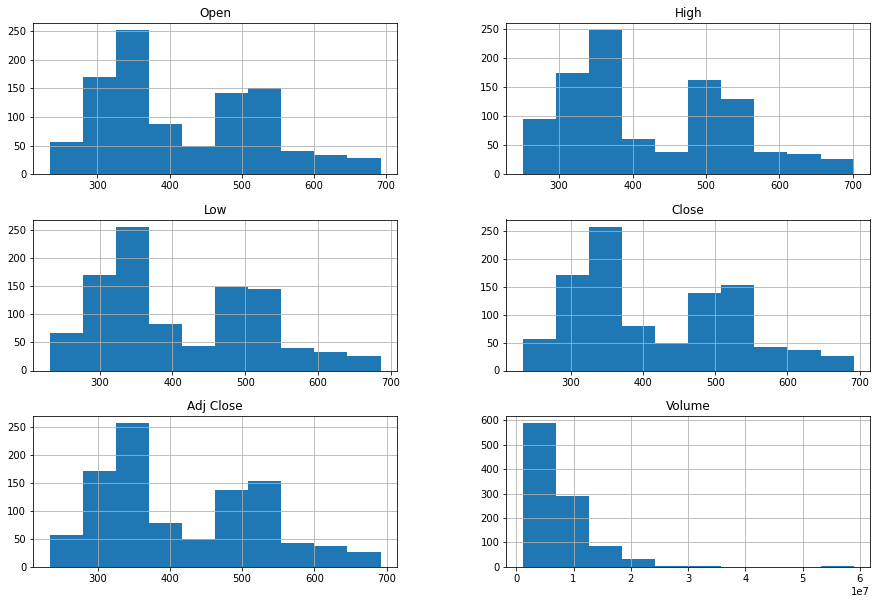

In [10]:
#plot the histogram for each variables
stock.hist(figsize=(15, 10))

- The histogram above shows the price
distribution in 5-year for all the stock price variables like open, close, adj close, high, and low.

- All the price data have two pearks which indicates that the variation of data is significant in two regions. 

- Meanwhile, the volume histogram shows the volume of stock by specific daily stock volume range.

- Unlike the price data, the volume of Netflix stock traded is right-skewed. Right-skewed data shows that the mean is greater than the median.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2d8062940>,
      dtype=object)

<Figure size 504x360 with 0 Axes>

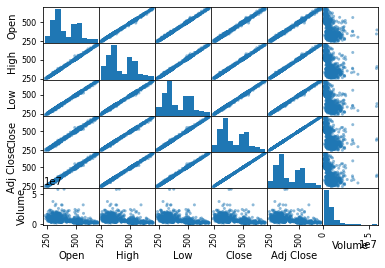

In [11]:
#plot the scatter plot matrix between all variables in the data
plt.figure(figsize=(7,5))
pd.plotting.scatter_matrix(stock)

- The scatter plot matrix shows that there is an upward trend between all variables, except for the stock volume.

- This indicates that all price variables (Open, High, Low, Close, Adj Close) are positively correlated.

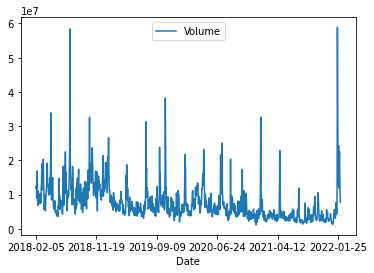

In [12]:
#plot a line graph to show the volume of stock traded across time
lines = stock.plot.line(x='Date', y='Volume')

- The line graph above shows that the daily volume of Netflix stock has a random component which indicates that the stock are randomly distributed over time. 

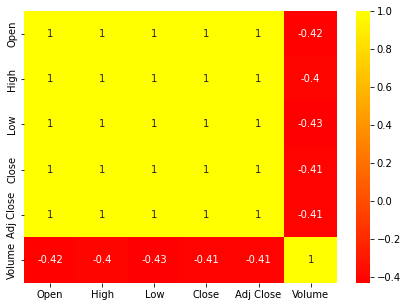

In [13]:
#check the correlation between variables using heatmap
plt.figure(figsize=(7,5))
sns.heatmap(stock.corr(),cmap='autumn',annot=True)

- Positive value of 1 indicates that most of the variables are perfectly correlated.

- However, this might be due to the small differences occurred between values.

- The statement make sense since small values in stock changes in the market affect the stock price movement significantly.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

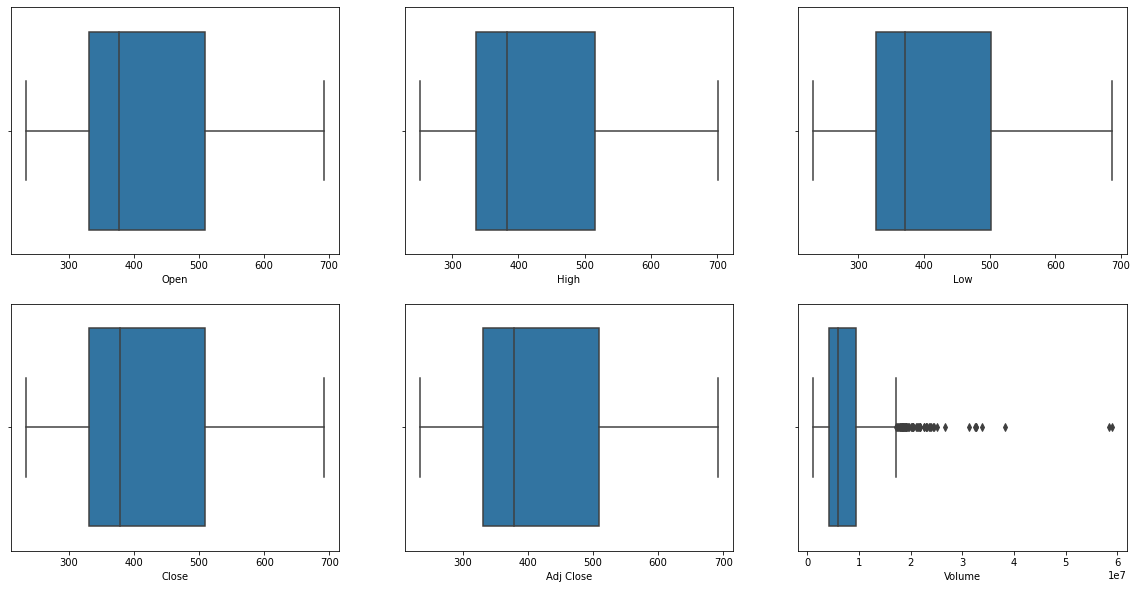

In [14]:
#outliers detection
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(stock[col])
plt.show()

- There are no outliers exist in all the variables except the 'Volume' data. 

## **Data Preparation Strategy**

Data preprocessing is an essential stage that needed to be taken in data mining practice. The raw data obtained from Kaggle are not cleaned and might consists of inconsistent or missing values. Issues like missing values, redundancies, and inaccurate data might lead to data integrity and reliability problem. In effect, the machine learning algorithms unable to learn the accurate pattern and affect the model performance. Therefore, data preprocessing is important to ensure that the prediction result is not biased and has high accuracy. 

#### **i) Feature Engineering**
Feature engineering refers to the extraction of new valuable features from the existing features in the stock data. Feature engineering helps to improve the speed of model training and model performance. The 'Date' will be seperated into 'day', 'month', 'year', and 'quarter'. The 'quarter' variable is important because it can largely affect the stock price changes. The 'quarter' is used to represent a group of three months.

#### **ii) Data Standardization**
The stock data invovled variables that measured at different scales like the 'Volume' and 'Close' columns. The difference between scales of variables might cause the prediction model to bias to the larger numeric value since the scales do not have an equal contribution to the model. In respect to this, the stock data should be standardize with a fixed range to ensure the machine learning models are trained well and accurately. This study applies a StandardScaler function to rescale the values between -1 and 1.   

#### **iii) Cross Validation**
Cross validation is a technique used in the evaluation of machine learning models through the training on subset data and evaluating them on complementary subset of data. Cross validation can helps to detect problems like overfitting and selection bias since it test the ability of the machine learning model on predicting new data. There are various methods that can be used in cross valdiation. This study will be using simple K-Folds that split the stock data into K parts and then K number of models will be built. Each model will then trained on K-1 parts and test on the other left part. 

## **Data Preparation Strategy Development**

#### **Feature Engineering**

In [3]:
#split the 'Date' column into three new columns based on the day, month, and year
splitted = stock['Date'].str.split('-', expand=True)
#add the new splitted columns into the dataframe
stock['day'] = splitted[2].astype('int')
stock['month'] = splitted[1].astype('int')
stock['year'] = splitted[0].astype('int')
#check whether the new columns are added correctly 
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018


In [4]:
#add another variable named 'is_quarter_end' to shows price changes 
#on quarter end and non quarter end months
stock['is_quarter_end'] = np.where(stock['month']%3==0,1,0)
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018,0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018,0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018,0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018,0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018,0


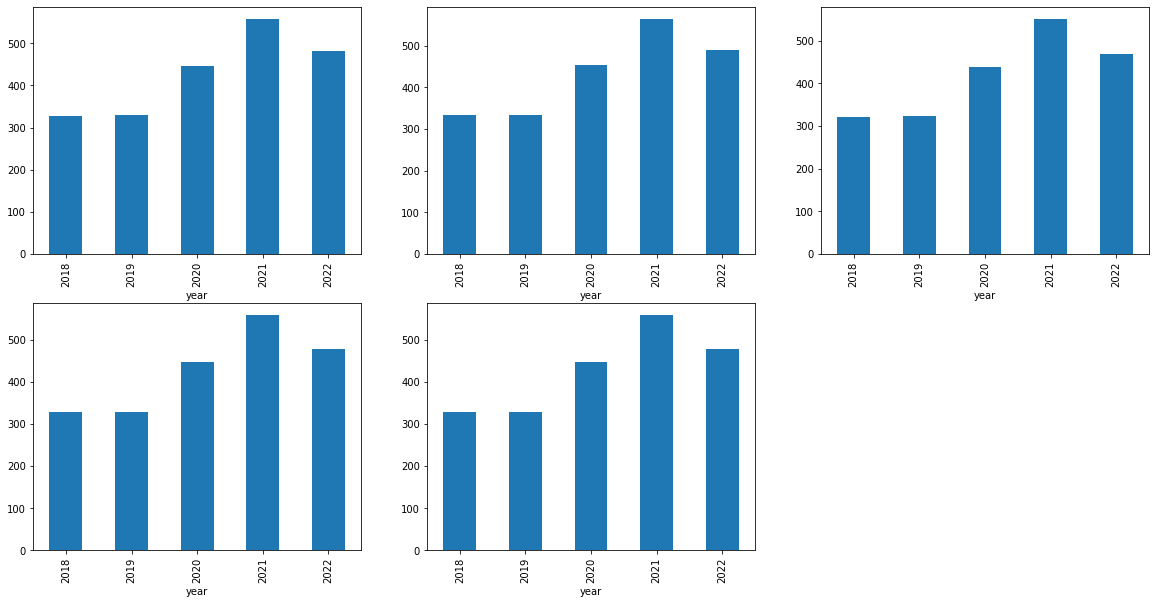

In [5]:
#plotting bar chart on the changes of stock price data over years
data_grouped = stock.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close', 'Adj Close']):
  plt.subplot(2,3,i+1)
  data_grouped[col].plot.bar()
plt.show()

- Based on the bar chart above, it shows that the stock prices reached a peak in the year 2021.

- The stock price does not have much changes in 2018 and 2019.

- There is an increase in the stock price from 2019 to 2021. However, the stock price started to fall slightly in 2022 but the price is still better than 2018, 2019, and 2020. 

In [6]:
#group the stock data based on 'is_quarter_end' 
#to easily compare the stock price and volume of stock traded 
#by quater end month and non-quarter end month
stock.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Adj Close,Volume,day,month,year
is_quarter_end,,,,,,,,,
0,418.681368,424.889821,412.112068,418.699791,418.699791,7.951664e+06,15.715774,6.087798,2019.622024
1,419.814037,426.179910,412.896440,419.600831,419.600831,6.810988e+06,15.721068,7.442136,2019.543027


- The Netflix stock price is slight higher in the months that are quarter end as compared to the months that are non-quarter.

- The number of stocks traded in the quarter end months are lower than the non-quarter months.

**- All the features are important based on the EDA done.**

## **Predictive Modelling**

- This study employs four machine learning algorithms which includes Linear Regression, Support Vector Machines, Decision Tree, and K-Nearest Neighbors to predict the Netflix stock price (adjusted close price).

In [7]:
#import required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

#### **Data Splitting and Standardization**

In [8]:
#define independent variables (X) and dependent variables (Y)
X = stock[["Open", "High", "Low", "Close", "Volume", "is_quarter_end"]]
y = stock["Adj Close"]
#split data into test and training set by setting 20% of data as test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [9]:
#data standardization
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

#### **Linear Regression**

In [10]:
#develop stock price prediction model using Linear Regression
lr_model=LinearRegression()
#fit the training set to train the model
lr_model.fit(X_train,y_train)
#predict using test set
lr_predict = lr_model.predict(X_test)
#show daily prediction of adjusted close price
print(lr_predict)

[553.72998  379.059998 361.399994 281.859985 261.429993 434.480011
 265.720001 518.02002  315.929993 348.869995 519.969971 321.089996
 489.820007 298.929993 510.720001 503.380005 288.859985 549.219971
 337.450012 269.579987 338.920013 294.160004 465.910004 368.970001
 290.170013 502.899994 498.619995 296.929993 351.140015 363.440002
 281.209991 543.710022 316.480011 540.72998  303.670013 519.780029
 339.850006 381.       515.780029 627.039978 481.790009 298.440002
 305.76001  265.320007 515.859985 297.570007 294.399994 385.029999
 359.609985 419.890015 365.98999  602.130005 481.329987 512.73999
 364.579987 418.649994 376.160004 360.269989 368.769989 361.040009
 295.76001  493.329987 491.869995 405.600006 325.209991 508.049988
 504.579987 354.98999  320.799988 344.720001 655.98999  351.290009
 262.130005 267.529999 426.700012 547.919983 351.850006 304.290009
 592.640015 368.48999  501.769989 502.809998 519.200012 653.159973
 359.910004 335.660004 390.519989 302.859985 356.970001 519.299

In [11]:
#get the summary of model performance statistic
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, lr_predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, lr_predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, lr_predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, lr_predict), 4))
print(f'Train Score : {lr_model.score(X_train, y_train) * 100:.2f}% and Test Score : {lr_model.score(X_test, y_test) * 100:.2f}% using Linear Regression.')
errors = abs(lr_predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
(R^2) Score: 1.0
Train Score : 100.00% and Test Score : 100.00% using Linear Regression.
Accuracy: 100.0 %.


#### **Support Vector Machine Regression**

In [12]:
#develop stock price prediction model using SVM with linear kernel
regr = svm.SVR(kernel='linear')
regr.fit(X_train, y_train)
svm_predict = regr.predict(X_test)
print(svm_predict)

[554.34432654 378.89848495 362.8421459  281.47659675 260.69682288
 434.9755812  259.91193401 516.93753335 315.30186188 348.1794721
 520.09162639 321.2972734  490.90269382 297.90877164 510.3860438
 501.80838926 289.41529147 548.16696074 335.94685917 268.77476138
 337.15934867 292.49710037 463.0260031  366.74306361 290.61838748
 502.2021692  497.02893215 296.96382762 353.67576819 364.88870027
 281.17264205 538.07049936 316.91561377 536.71768174 304.9740386
 519.42757897 340.44692068 377.50063282 511.03576313 629.94158693
 482.27578043 297.90151857 303.64182267 267.593464   516.06500977
 292.10930522 295.2464924  383.20417885 357.63407417 414.0296779
 367.19971652 606.73822337 480.61080054 512.37110937 365.82818033
 416.47979656 376.58269927 356.35411704 374.90720967 360.13259798
 295.28947929 500.34330914 489.91515399 411.49938516 324.95123511
 505.28932929 501.99822592 351.3582991  320.52253702 339.83279821
 655.35298637 351.31672766 265.76807396 267.84070432 426.97846
 548.8306517  351

In [13]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, svm_predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, svm_predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, svm_predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, svm_predict), 4))
print(f'Train Score : {regr.score(X_train, y_train) * 100:.2f}% and Test Score : {regr.score(X_test, y_test) * 100:.2f}% using Support Vector Machine.')
errors = abs(svm_predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 2.0347
Mean Squared Error: 7.7504
Root Mean Squared Error: 2.7839
(R^2) Score: 0.9993
Train Score : 99.94% and Test Score : 99.93% using Support Vector Machine.
Accuracy: 99.52 %.


#### **Decision tree regression**

In [14]:
from sklearn import tree

In [15]:
#develop stock price prediction model using decision tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
dt = clf.predict(X_test)
print(dt)

[553.330017 379.23999  361.209991 282.649994 260.579987 431.820007
 265.920013 517.570007 315.899994 348.519989 520.25     321.100006
 490.100006 298.839996 510.399994 503.839996 288.850006 549.570007
 337.589996 269.700012 339.559998 294.179993 466.26001  369.01001
 290.059998 502.779999 497.980011 296.779999 350.920013 363.600006
 281.040009 541.940002 317.380005 540.679993 304.320007 520.25
 339.5      380.709991 515.409973 628.080017 482.350006 298.600006
 306.160004 264.75     515.919983 297.809998 294.339996 384.359985
 359.700012 418.970001 365.48999  606.049988 480.630005 512.179993
 364.559998 418.970001 375.5      360.350006 369.209991 361.049988
 295.029999 492.410004 491.359985 403.829987 325.220001 507.790009
 504.209991 355.059998 321.549988 344.5      651.450012 351.269989
 262.799988 267.660004 426.75     548.219971 352.01001  303.470001
 593.73999  368.329987 501.670013 502.779999 518.909973 646.909973
 359.970001 335.660004 390.399994 302.600006 356.869995 518.909973


In [16]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, dt), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, dt), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, dt)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, dt), 4))
print(f'Train Score : {clf.score(X_train, y_train) * 100:.2f}% and Test Score : {clf.score(X_test, y_test) * 100:.2f}% using Decision Tree.')
errors = abs(dt - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 0.777
Mean Squared Error: 3.7477
Root Mean Squared Error: 1.9359
(R^2) Score: 0.9997
Train Score : 100.00% and Test Score : 99.97% using Decision Tree.
Accuracy: 99.84 %.


#### **K-Nearest Neighbors (KNN)**

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
#develop stock price prediction model using KNN
knn_regressor = KNeighborsRegressor(n_neighbors = 5)
knn_model = knn_regressor.fit(X_train,y_train)
knn_pred = knn_model.predict(X_test)
print(knn_pred)

[554.8640016 376.8040038 363.4539978 281.4279968 266.6579988 430.627997
 264.2480012 516.723993  320.1959962 349.0999996 516.1920044 318.6260008
 486.452002  299.1400026 515.0140014 498.0119934 295.5820008 547.773999
 334.1679932 270.4099978 334.6600034 292.5279968 461.2080018 366.2460022
 298.9559998 502.0279906 495.3360048 293.7100038 350.6440064 363.3839964
 287.1200012 529.8739868 311.0179992 528.871997  312.6179992 520.995996
 343.2739988 374.626001  509.9539978 629.8899902 483.0620056 298.9559998
 312.6179992 269.2599974 511.7179808 296.1919984 289.3380064 380.6640014
 357.5399962 412.7739992 370.05      607.6579958 483.6900024 509.9539978
 355.6599974 413.1179994 377.9859926 354.6219968 373.0519958 360.546002
 289.0319946 501.15      487.0300048 413.1179994 344.0720032 503.8880004
 501.302002  351.0080016 316.552002  336.1119934 653.6579956 347.1200012
 269.4920044 270.0059936 426.0359984 551.75      350.3999938 300.9440002
 589.1100098 363.567993  510.352002  504.891992  530.25

In [19]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, knn_pred), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, knn_pred), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, knn_pred)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, knn_pred), 4))
print(f'Train Score : {knn_model.score(X_train, y_train) * 100:.2f}% and Test Score : {knn_model.score(X_test, y_test) * 100:.2f}% using KNN.')
errors = abs(knn_pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 4.6151
Mean Squared Error: 53.3243
Root Mean Squared Error: 7.3023
(R^2) Score: 0.9953
Train Score : 99.71% and Test Score : 99.53% using KNN.
Accuracy: 98.89 %.


##### **Result of Predictive Modelling**

- Based on the summary of each model performance report, Linear Regression is proved to outperform the SVM, KNN, and Decision Tree since it has the highest accuracy of 100%. There is no error found in the Linear Regression model after trained and tested. 

- In contrast, KNN has the worst performance in predicting the stock price since the accuracy (98.89%) is the lowest among the four machine learning algorithms. The mean absolute error which represent the difference between the estimated and actual values shows that KNN has the hgihest error (4.61) as compared to the others.

- All the models have more than 99% of the variability observed in the target variable is explained by the regression model. 

- Overall, all the stock price prediction model have a good performance since the accuracy are above 95%.

#### **K-Fold Cross Validation**

In [20]:
#import required libraries
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [32]:
#prepare the cross-validation procedure 
#shuffle the data and set k=20 parts
kfold = KFold(n_splits=20, random_state=100, shuffle=True)
#evaluate model
results_kfold = cross_val_score(lr_model, X_test, y_test.astype('int'), cv=kfold)
#report performance
print("Accuracy of Linear Regression: ", results_kfold.mean()*100)

Accuracy of Linear Regression:  99.99885187575724


In [34]:
svm_kfold = KFold(n_splits=20, random_state=100, shuffle=True)
results_kfold = cross_val_score(regr, X_test, y_test.astype('int'), cv=kfold)
print("Accuracy of SVM: ", results_kfold.mean()*100)

Accuracy of SVM:  99.78436394081565


In [36]:
dt_kfold = KFold(n_splits=20, random_state=100, shuffle=True)
results_kfold = cross_val_score(clf, X_test, y_test.astype('int'), cv=kfold)
print("Accuracy of Decision Tree: ", results_kfold.mean()*100)

Accuracy of Decision Tree:  99.70457267797583


In [35]:
knn_kfold = KFold(n_splits=20, random_state=100, shuffle=True)
results_kfold = cross_val_score(knn_model, X_test, y_test.astype('int'), cv=kfold)
print("Accuracy of KNN: ", results_kfold.mean()*100)

Accuracy of KNN:  98.23590769073967


- Cross validation can helps to improve the model accuracy and avoid problem like overfitting. 

- This study uses k=20 folds to split the stock data.

- The result shows that Linear Regression achieve the highest performance in predicting the Netflix stock price. 

#### **Actual Vs Predicted Stock Price**

The bar chart below shows the comparison of actual and predicted Netflix stock price for Linear Regression, SVM, Decision Tree, and SVM.

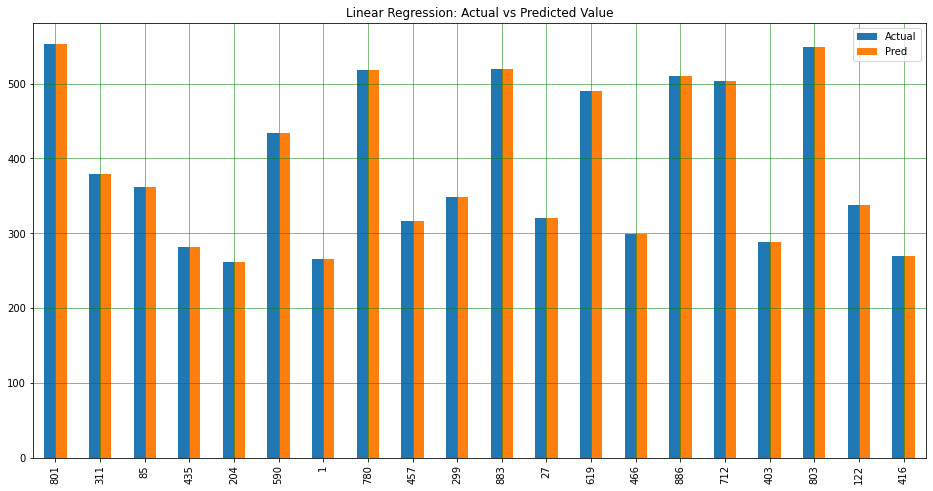

In [38]:
#plot the actual and predicted stock price value by each machine learning algorithms
#only show the top 20 rows data in the bar chart
plot_df = pd.DataFrame({'Actual':y_test,'Pred':lr_predict})
plot_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Linear Regression: Actual vs Predicted Value")
plt.show()

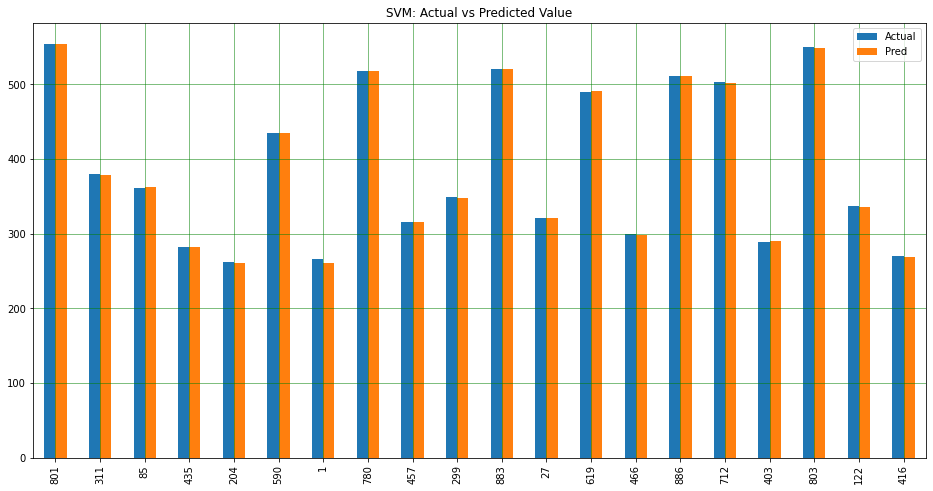

In [39]:
plot_df = pd.DataFrame({'Actual':y_test,'Pred':svm_predict})
plot_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("SVM: Actual vs Predicted Value")
plt.show()

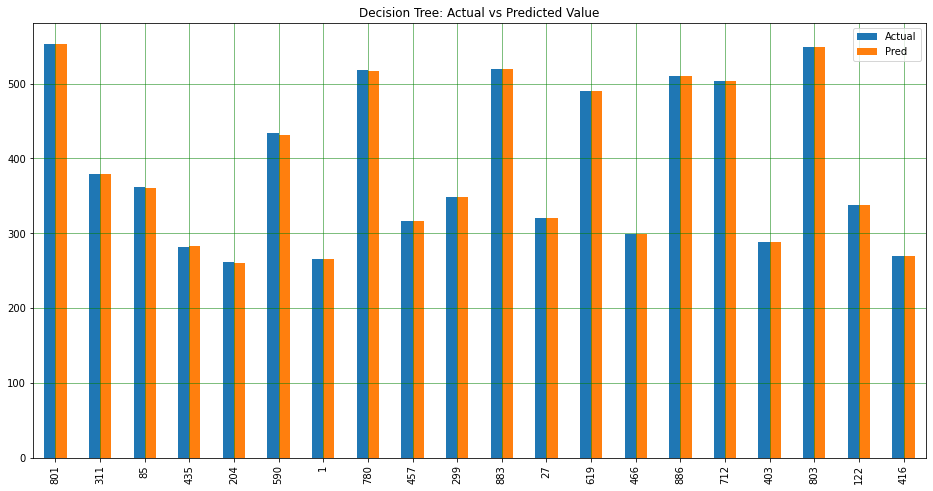

In [40]:
plot_df = pd.DataFrame({'Actual':y_test,'Pred':dt})
plot_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Decision Tree: Actual vs Predicted Value")
plt.show()

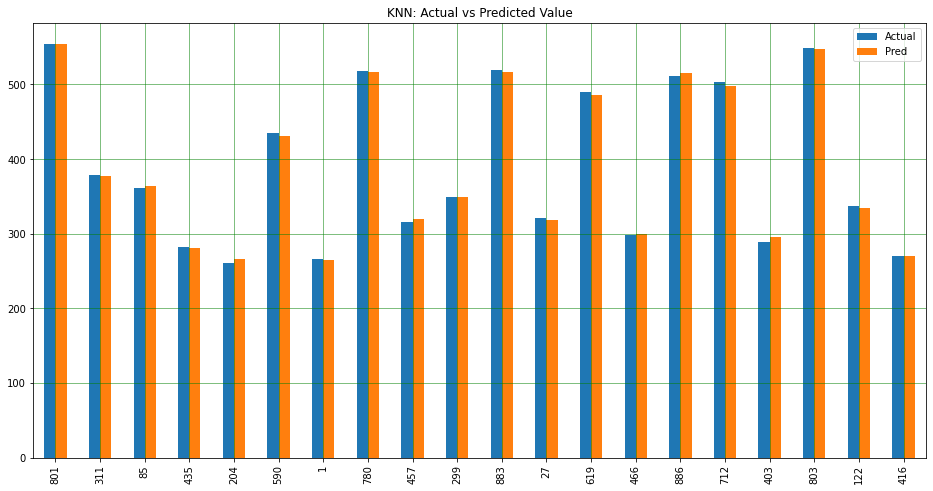

In [42]:
plot_df = pd.DataFrame({'Actual':y_test,'Pred':knn_pred})
plot_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("KNN: Actual vs Predicted Value")
plt.show()

- According to the four bar chart shown above, Linear Regression and Decision Tree seems to have a more accurate prediction as compared to another two machine learning models which is SVM and KNN.

- Meanwhile, KNN has the lowest performance in predicting the Netflix stock price since most of the predicted and actual value shown in the graph have a significant difference. 

#### **Conclusion**

- Based on the results obtained from both normal data splitting and cross validation, Linear Regression that has the highest accuracy is the best model to predict the Netflix stock price. 
- Meanwhile, KNN has the lowest performance as compared to Linear Regression, Decision Tree, and SVM. 
- The result of using percentage and cross validation to split data are similar.
- By using the machine learning algorithms to develop a stock price prediction model, it helps the investors to understand the historical price pattern and provide accurate predictionas a reference for the investors to decide whether to buy or sell the stock. 